In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from score_plotting_utils import create_fig_path

sns.set_style("ticks")
sns.set(context=None, style=None, palette=None, font_scale=5, color_codes=None)
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 15})
plt.rcParams['legend.fontsize'] = 15

PuBu = cm.get_cmap('PuBu')
GnBu = cm.get_cmap('GnBu')
PuRd = cm.get_cmap('PuRd')
palette = [PuBu(0.6), GnBu(0.6), PuRd(0.6)]

In [2]:
import os
import numpy as np
experiment_path = 'results/SBM/SBM_MC_tanh_nnodes50_p10.5_delta_p0.5_min_weight0_bin_directedTrue_wei_directedFalse'

LE_trajectory_alpha1 = np.load(os.path.join(experiment_path, 'LE', 'LEs_trajectory_alpha1.0_level3_module0_2.npy'))
LE_trajectory_alpha12 = np.load(os.path.join(experiment_path, 'LE', 'LEs_trajectory_alpha1.2_level3_module0_2.npy'))

#criticality
rs_level1 = np.load(os.path.join(experiment_path, 'reservoir_states', 'critical_rs_alpha1.0_level1_module0_2.npy'))
rs_level2 = np.load(os.path.join(experiment_path, 'reservoir_states', 'critical_rs_alpha1.0_level2_module0_2.npy'))
rs_level3 = np.load(os.path.join(experiment_path, 'reservoir_states', 'critical_rs_alpha1.0_level3_module0_2.npy'))

In [3]:
from conn2res.plotting import plot_reservoir_states

from conn2res.tasks import Conn2ResTask
task = Conn2ResTask('MemoryCapacity')
x, y = task.fetch_data(n_trials=2000, horizon_max=16, win=100, seed=102)

/poolz0/fmilisav/miniconda3/envs/conn2res_dev_env_neurogym/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


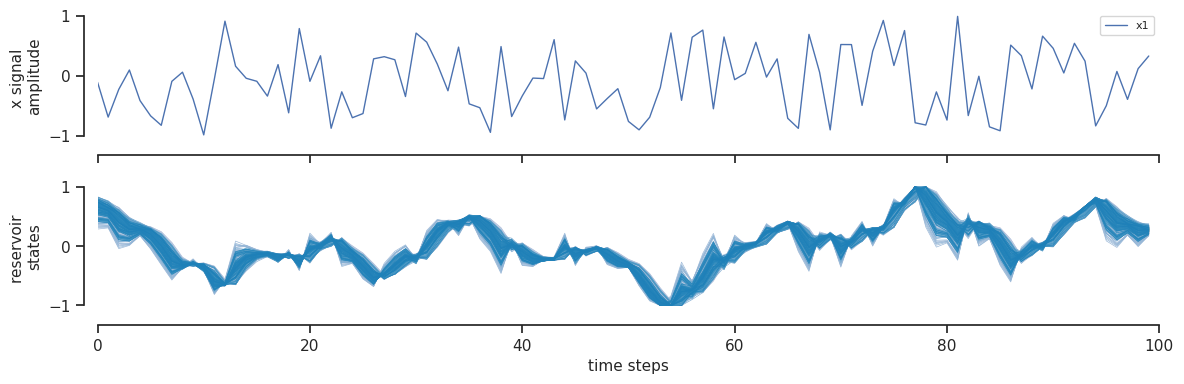

In [4]:
fig_path = create_fig_path(experiment_path)
PuBu_list = PuBu(np.linspace(0.25, 0.75, rs_level1.shape[1]))
plot_reservoir_states(x[100:200], rs_level1[:100, 50:], palette=PuBu_list, savefig=True, rescale=True,
                      rc_params={'savefig.format': 'svg'}, ax_params=[{'xlim': [0, 100]}, {'xlim': [0, 100]}],
                      fname=fig_path + '/rs_critical_level1_rescaled')

/poolz0/fmilisav/miniconda3/envs/conn2res_dev_env_neurogym/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


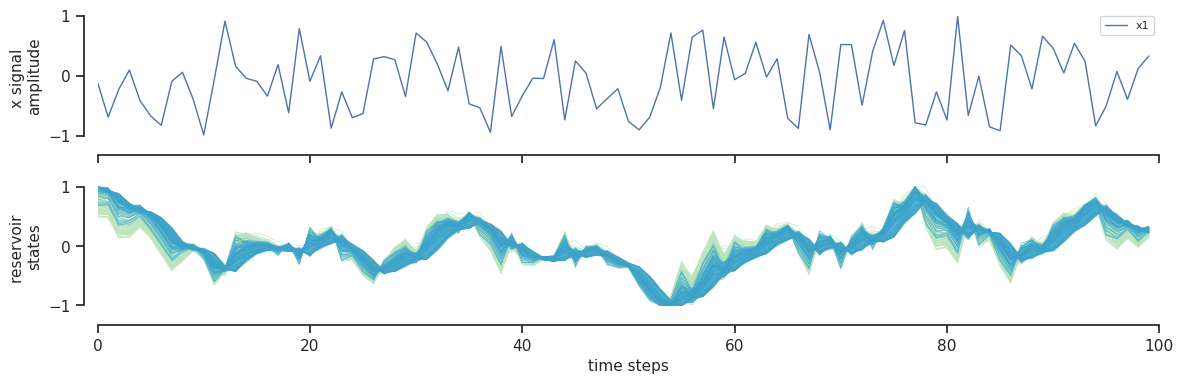

In [5]:
GnBu_list = GnBu(np.linspace(0.25, 0.75, rs_level1.shape[1]))
plot_reservoir_states(x[100:200], rs_level2[:100, 50:], palette=GnBu_list, savefig=True, rescale=True, 
                      rc_params={'savefig.format': 'svg'}, ax_params=[{'xlim': [0, 100]}, {'xlim': [0, 100]}],
                      fname=fig_path + '/rs_critical_level2_rescaled')

/poolz0/fmilisav/miniconda3/envs/conn2res_dev_env_neurogym/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


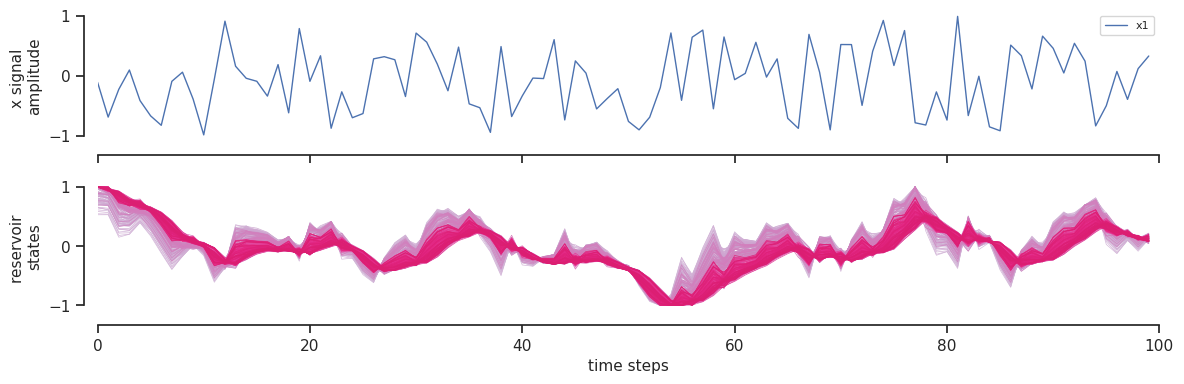

In [6]:
PuRd_list = PuRd(np.linspace(0.25, 0.75, rs_level1.shape[1]))
plot_reservoir_states(x[100:200], rs_level3[:100, 50:], palette=PuRd_list, savefig=True, rescale=True, 
                      rc_params={'savefig.format': 'svg'}, ax_params=[{'xlim': [0, 100]}, {'xlim': [0, 100]}],
                      fname=fig_path + '/rs_critical_level3_rescaled')

/poolz0/fmilisav/conn2res/conn2res/plotting.py:347: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


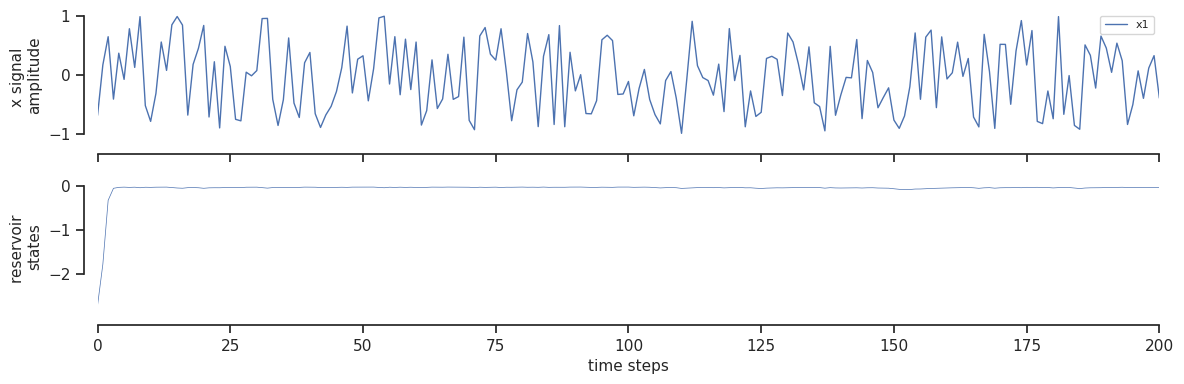

In [7]:
plot_reservoir_states(x, LE_trajectory_alpha1[:, 0], palette=PuRd_list, savefig=True, 
                      rc_params={'savefig.format': 'svg'}, 
                      fname=fig_path + '/LE_trajectory_critical')

/poolz0/fmilisav/conn2res/conn2res/plotting.py:347: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


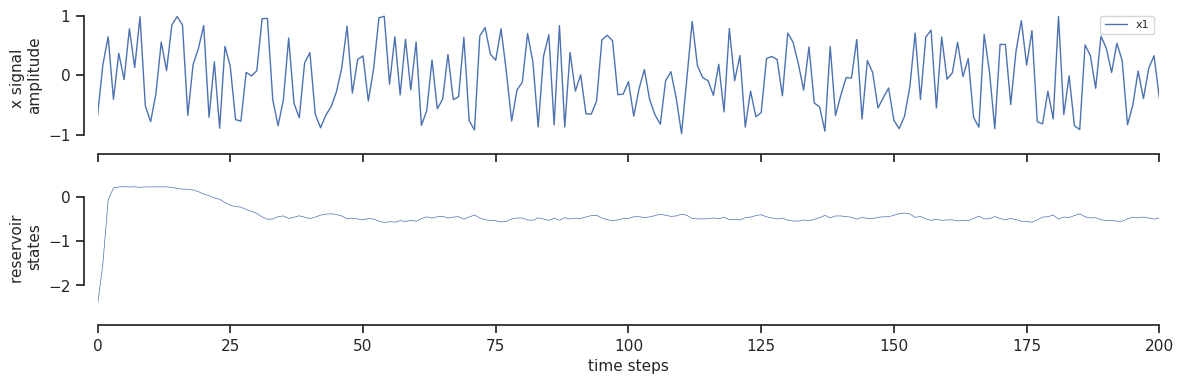

In [8]:
plot_reservoir_states(x, LE_trajectory_alpha12[:, 0], palette=PuRd_list, savefig=True, 
                      rc_params={'savefig.format': 'svg'}, 
                      fname=fig_path + '/LE_trajectory_chaotic')

In [10]:
experiment_path = 'results/SBM/SBM_MC_tanh_nnodes50_p10.5_delta_p0.5_min_weight0_bin_directedTrue_wei_directedFalse_3'
fig_path = create_fig_path(experiment_path)
rs_critical = np.load(os.path.join(experiment_path, 'reservoir_states', 'critical_rs_alpha1.0_level3_module0_2.npy'))
rs_chaotic = np.load(os.path.join(experiment_path, 'reservoir_states', 'chaotic_rs_alpha1.2_level3_module0_2.npy'))

/poolz0/fmilisav/miniconda3/envs/conn2res_dev_env_neurogym/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


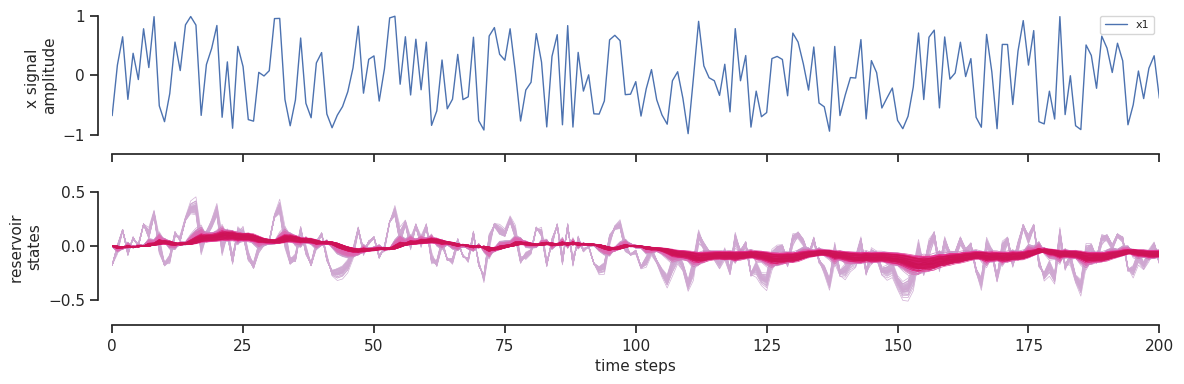

In [11]:
plot_reservoir_states(x, rs_critical, palette=PuRd_list, savefig=True, 
                      rc_params={'savefig.format': 'svg'}, 
                      fname=fig_path + '/rs_critical_level3')

/poolz0/fmilisav/miniconda3/envs/conn2res_dev_env_neurogym/lib/python3.9/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


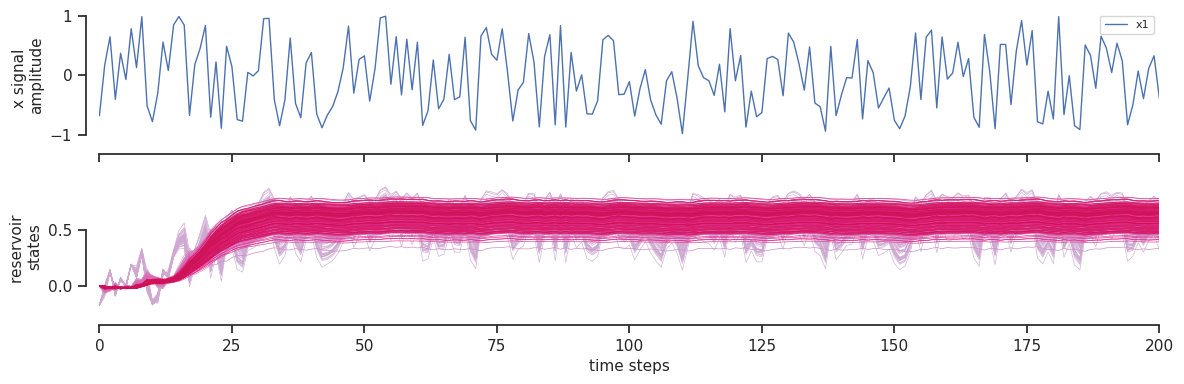

In [12]:
plot_reservoir_states(x, rs_chaotic, palette=PuRd_list, savefig=True, 
                      rc_params={'savefig.format': 'svg'}, 
                      fname=fig_path + '/rs_chaotic_level3')

In [13]:
import json
experiment_path = 'results/SBM/SBM_MT_tanh_nnodes50_p10.5_delta_p0.5_min_weight0_bin_directedTrue_wei_directedFalse_1'
config_path = experiment_path + '/config.txt'
with open(config_path, 'r') as f:
    config = json.load(f)

import argparse
config = argparse.Namespace(**config)

from task import Multitasking
#example multitasking data
MT = Multitasking(config)
MT.seed=0
MT.init_multitasking_data(100)

In [14]:
#plot and save timeseries
import matplotlib.pyplot as plt
fig_path = create_fig_path(experiment_path)
for task in range(MT.x_train.shape[1]):
    if task // 4 == 0:
        plt.plot(MT.x_train[:100, task])
    else:
        plt.plot(MT.x_train[:1000, task])
    plt.axis('off')
    plt.savefig(fig_path + f'/MT_{task}_timeseries.svg', dpi=300)
    plt.close()